# Parametrische und nicht parametrische Schätzung der Zuverlässigkeit 
## Bachelorarbeit Julia Staiger
### Hochschule Reutlingen


### Die Daten müssen aufweisen:

- **<font color = 'red' >Lebensdauer</font> (Stunden, Tage, Wochen usw.)**

- **<font color = 'red' >Beobachtungswert</font> (Zahlenwerte)** Eine Variable die in Abhängigkeit zu der Lebensdauer steht und mithilfe von einem Grenzwert angibt, ob das Ereignis eingetreten ist. (Bsp. ab dem Wert x muss das Werkzeug ausgewechselt werden)
  
  **oder**

- **Eintritt des Ereignisses <font color = 'red' >Zensur</font> (1 und 0)**: Sind die Daten zensiert oder nicht zensiert. Zum Beispiel fällt ein Teil während der Untersuchung aus, so sind diese Daten nicht zensiert. Hat das Teil jedoch die Untersuchung überlebt, so gilt die Daten als zensiert.

### Import der Packages
Zuerst werden alle benötigten Packages vorab importiert 

In [ ]:
#Für die Nutzung von Kaggle muss zuerst lifelines importiert werden
pip install lifelines

In [1]:
import pandas as pd                         #Datenanalyse
import numpy as np                          #Wissenschaftliches Rechnen und numerische Berechnungen
import matplotlib.pyplot as plt             #ermöglicht graphische Dastellung
import matplotlib.patches as mpatches       #Für schöne Legenden in Grafiken
from scipy import stats                     #Wahrscheinlichekeitsverteilungen
import seaborn as sns                       #Statistische Darstellung
from lifelines import KaplanMeierFitter     #für die Kaplanmeier-Verteilung               
from lifelines import NelsonAalenFitter     #für die Nelson-Aalen-Schätzung
from lifelines import WeibullFitter         #für die Weibull-Verteilung
from lifelines import CoxPHFitter           #für Cox-Regression

## Vorbereitung der Daten

Vorbereitung der Daten: 
- Es muss sich um eine **csv-Datei** handeln. 
- Die Spalte mit den Angaben zu der Lebensdauer muss in der csv-Datei in **"Lebensdauer"** umbenannt werden.
- Die Spalte mit den Angaben zu dem Eintritt des Ereignisses (zensiert oder nicht zensiert) muss in **"Zensur"** umbenannt werden.
 **Falls die Variable noch nicht existert kann diese in den weiteren Schritten mithilfe eines Grenzwertes erstellt werden**

## Einlesen der csv-Datei
Den passenden Pfad folgendermaßen umschreiben: 
df = pd.read_csv(r"C:\Users\.... Order......\ Name der csv-Datei.csv")

Bsp. df = pd.read_csv(r"C:\Users\julia\Documents\Bachelorarbeit\Daten\Werkzeugverschleiß.csv")



In [2]:
#Einlesen der Daten mit folgenden Pfad
df = pd.read_csv(r"C:\Users\julia\Documents\7.Semester\Bachelorarbeit\Daten_Simulieren\smartphone.csv")


Ist die Variable "Zensur" verfügbar? -> Ja oder Nein? 
Falls diese nicht verfügbar ist, so kann dies mithilfe eines Grenzwertes erstellt werden. Dabei muss die Bennenung der Variablen angegeben werden, die in Abhängigkeit mit der Lebensdauer steht.

**Führen sie folgenden Befehl aus um die Variable Zensur mit einem Grenzwert zu erstellen:**

In [3]:
#Abfrage, ob Zensur verfügbar ist
a = input('Ist die Variable Zensur verfügbar? (Mit Ja oder Nein antworten): ')
#Wenn die Antwort Ja ist, dann wird der Text ausgegeben
if a == 'Ja':
    print('Zensur ist verfügbar')
#Ist die Antwort Nein, so wird eine Variable erzeugt, anhand von Werten und einem Grenzwert
elif a=='Nein':
    print('Zensur ist nicht verfügbar')
    #Abfrage nach der Variable
    c= input('Name der Variable, mit den Werten für die Variable Zensur?')
    b = input('Grenze?')
    #Unterhalb dem Wert b hat die Zensur den Wert 0 und überhalb 1
    df.loc[df[c] > int(b), 'Zensur'] = 1 # oberhalb der Grenze 1
    df.loc[df[c] < int(b), 'Zensur'] = 0 # unterhalb der Grenze 0
else: 
    print('Fehler: Keine gültige Antwort')
    
#Die ersten 5 Zeilen der Tabelle wird angezeigt, um zu überprüfen, ob alles funktioniert hat 
df.head()

Ist die Variable Ereignis verfügbar? (Mit Ja oder Nein antworten): Ja
Ereignis ist verfügbar


,Unnamed: 0,Lebensdauer,Batterie,Modell,Baujahr,Ereignis
0,0,3.063836,1,1,2019,0
1,1,1.574984,1,1,2020,0
2,2,3.995907,1,1,2021,0
3,3,2.936783,1,2,2019,0
4,4,7.229553,1,2,2020,1


### Überprüfung, ob die Variablen Lebensdauer und Zensur vorhanden sind: 


In [4]:
#Wenn die Variable Lebensdauer vorhanden ist, dann wird folgender Test angegeben
if {'Lebensdauer'}.issubset(df.columns):
    print ('Die Variable Lebensdauer ist verfügbar')
else:
    print('Fehler: Die Variable Lebensdauer ist nicht verfügbar')
    
#Wenn die Variable Zensur vorhanden ist, dann wird folgender Test angegeben
if {'Zensur'}.issubset(df.columns):
    print ('Die Variable Zensur ist verfügbar')
else:
    print('Fehler: Die Variable Zensur ist nicht verfügbar')

Die Variable Lebensdauer ist verfügbar
Die Variable Ereignis ist verfügbar


Erscheint eine Fehlermeldung und ist eine der beiden Variablen nicht vorhanden:

In der csv-Datei die Spalte Lebensdauer richtig umbenannen oder die obere Spalte zur Erstellung der Zensur nochmal ausgeführen.

### Dataframe
Die Daten werden in Form einer Tabelle angeordnet.

Die Tabelle wird **df**(Dataframe) genannt.

Mit dem Befehl "df.head()" werden die **ersten 5 Zeilen der Tabelle** anzeigt

In [ ]:
df.head()

Nun wird überprüft, ob einzelne Daten fehlen. 
Nur bei Variablen, die Zahlenwerte enthalten können die NaN-Daten ersetzt werden. Bei Daten bei denen ein Wort fehlt werden diese nicht ersetzt.

In [5]:
#Gibt an, ob Daten fehlen und auch deren Anzahl
#Null-Series wird erstellt, diese gibt die Anzahl an fehlenden Daten pro Variable an
Null= df.isnull().sum()
#die fehlenden Zahlen aller Variablen wird aufsummiert
b =sum(Null)
#Ist die Summe Null, so sind alle Daten vorhanden
if b == 0:
    print('Es fehlen keine Werte.')
#Ist die Summe größer Null, so fehlen Daten
elif b >0:
    print('Es fehlen Werte.\nDie Anzahl der fehlenden Werte entspricht: '"%.0f" %b)
    #Gibt die Variablen an, bei denen Daten fehlen
    #Neue Serie wird erstellt mit den Variablen, bei denen der Wert größer 0 ist
    Null_1=Null>0
    Null_1=Null[Null_1]
    e= Null_1.shape[0]
    print('Bei den folgenden Variablen fehlen Daten: ')
    #Eine Schleife gibt die Namen der Variablen aus
    for i in range(0, e):
        a  =Null_1.index[i]
        print(a)
        if i== e:
            break 
    Zahl_Zeile=0
    #a gibt die Summe der fehlenden Daten in der 0.Zeile (in Excel ist dies die 1. Zeile) an.
    a= df.iloc[0,].isnull().sum()
    #Ist a größer Null, somit gibt es NaN-Werte, dann wird die nächste Zeile verwendet
    while a> 0:
        a= df.iloc[Zahl_Zeile,].isnull().sum()
        Zahl_Zeile= Zahl_Zeile+1
        #Wenn a=0 ist, dann gibt es keine fehlenden Daten in der Zeile. Die Schleife wird abgebrochen.
        if a == 0:
            break
    for d in range(0,e):
        h =df[Null_1.index[d]]
        #f ist der jeweilige Wert aus der Tabelle
        f= h.iloc[Zahl_Zeile-1,]
        #nun wird abgefragt, welcher Typ der Wert f ist-> string oder anderes 
        if type(f) == str:
            print ('Die folgende Variable ist ein string: ' + Null_1.index[d] )
            #ent= Null_1.drop(labels = [Null_1.index[d]])
        else:
            print('Die folgende Variable ist ein float: ' + Null_1.index[d])
            #Fehlen Daten, so wird der Mittelwert aller Daten aus der Spalte ermittelt und diesen für die fehlenden Zahlen übernommen.
            df[Null_1.index[d]].fillna(df[Null_1.index[d]].mean(), inplace = True)
            print('Fehlende Daten wurden ersetzt.')
    
#Prüfen, ob es sich um fehlende Zahlen handelt (float oder integer) oder Buchstaben (string). 
#Nur Zahlen können ersetzt werden.
#Erst wird getestet welche Zeile aus der Tabelle verwendet werden kann (Zeile darf keine fehlende Daten haben NaN-Werte)

Es fehlen keine Werte.


## Kaplan-Meier Schätzer
Eine Kaplan-Meier-Schätzung wird durchgeführt.
Die Kaplan-Meier-Schätzung gibt die Wahrscheinlichkeit an, dass ein bestimmtes Ereignis innerhalb eines Zeitintervalls eintritt.


durations = Daten ["Zeit"]   Hierbei wird die Spalte mit den Zeiteinheiten angegeben (Tage, Wochen..).

event_observed = Daten ["Zensur"]    Hierbei wird die Spalte angegeben die angibt, ob das Ereignis eintritt oder nicht (0 & 
1).

- 1 = Fehler/Ausfall
- 0 = kein Fehler/ nicht zensiert

Befehle: 

- plt.titel kann die Überschrift der Grafik eingestellt werden.
- pltt.ylabel / xlable gibt die jeweilige Achsbenennung an.
- frontsize gibt die Schriftgröße an.
- labelpad gibt den Abstand zwischen Schrift und Achse an


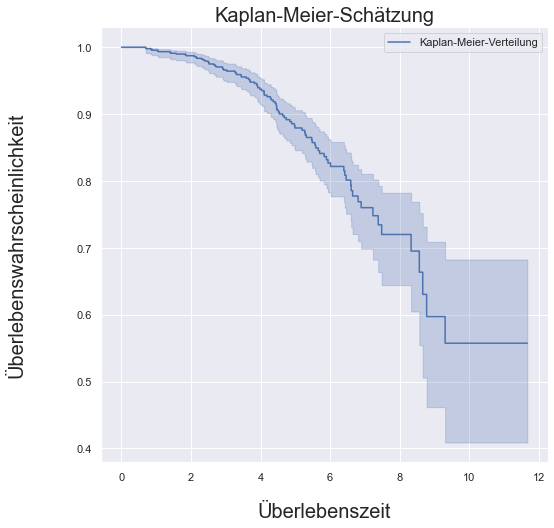

In [28]:
#Durchführung einer Kaplan-Meier Schätzung
kmf = KaplanMeierFitter()
#durations = Lebensdauer; event_observed = Zensur
kmf.fit(durations =  df["Lebensdauer"], event_observed = df["Zensur"],label = 'Kaplan-Meier-Verteilung')

#Grafik plotten
sns.set(rc={'figure.figsize':(8,8)})
plt.figure()
kmf.plot()
#Überschrift
plt.title("Kaplan-Meier-Schätzung",fontsize=20)
#Benennung der y-Achse
plt.ylabel("Überlebenswahrscheinlichkeit",fontsize=20, labelpad=50)
#Benennung der x-Achse
plt.xlabel("Überlebenszeit",fontsize=20, labelpad=20)
plt.show()

Auswertung:

Kaplan-Meier-Schätzung ohne Konfidenzitervalle
Vergleich der Befehle:

- Kaplan-Meier-Schätzung ohne Konfidenzitervalle:
kmf.survival_function_.plot()

- Kaplan-Meier-Schätzung mit Konfidenzitervalle:
kmf.plot()

<Figure size 576x576 with 0 Axes>

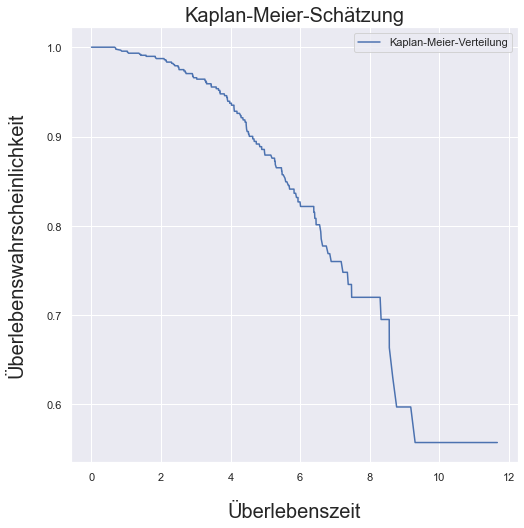

In [27]:
#Kaplan-Meier Schätzung ohne Konfidenzintervalle
sns.set(rc={'figure.figsize':(8,8)})
plt.figure()
kmf.survival_function_.plot()
#Überschrift
plt.title("Kaplan-Meier-Schätzung",fontsize=20)
#Benennung der y-Achse
plt.ylabel("Überlebenswahrscheinlichkeit",fontsize=20, labelpad=20)
#Benennung der x-Achse
plt.xlabel("Überlebenszeit",fontsize=20, labelpad=20)
plt.show()

## Nelson-Aalen-Schätzer
Eine Nelson-Aalen-Schätzung wird durchgeführt.
Die Nelson-Aalen-Schätzung gibt die Wahrscheinlichkeit an, dass ein bestimmtes Ereignis zum Zeitpunkt t eintritt.


Eine neue Variable wird erstellt, welche die zu überwachende Zensur angibt. (Genau das gegenteil von der Zensur bei der Kaplan-Meier-Schätzung)
- 1 = zensiert
- 0 = Fehler/ Ausfall

In [9]:
#Alle Null-Werte werden unter einer neuen Variable mit 1 ersetzt
df.loc[df.Zensur == 0, 'Zensur_2'] = 1 # zensiert
#Alle Werte mit 1 werden unter einer neuen Variable mit 0 ersetzt
df.loc[df.Zensur == 1, 'Zensur_2'] = 0 # Fehler/ Ausfall
#Tabelle anzeigen
df.head()

,Unnamed: 0,Lebensdauer,Batterie,Modell,Baujahr,Ereignis,Ereignis_2
0,0,3.063836,1,1,2019,0,1.0
1,1,1.574984,1,1,2020,0,1.0
2,2,3.995907,1,1,2021,0,1.0
3,3,2.936783,1,2,2019,0,1.0
4,4,7.229553,1,2,2020,1,0.0


durations = Daten["Zeit"]   Hierbei wird die Spalte mit den Zeiteinheiten angegeben (Tage, Wochen..).

event_observed = Daten["Zensur_2"]    Hierbei wird die Spalte angegeben die angibt, ob das Ereignis eintritt oder nicht (0 & 
1).
Befehle: 

- plt.titel kann die Überschrift der Grafik eingestellt werden.
- pltt.ylabel / xlable gibt die jeweilige Achsbenennung an.
- frontsize gibt die Schriftgröße an.
- labelpad gibt den Abstand zwischen Schrift und Achse an


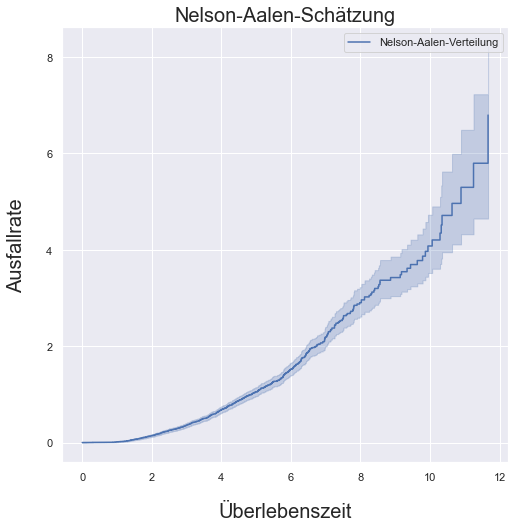

In [26]:
#Nelson-Aalen Schätzung durchführen
naf = NelsonAalenFitter(nelson_aalen_smoothing=False)
#durations = Lebensdauer; event_observed = Zensur
naf.fit(durations = df["Lebensdauer"], event_observed = df["Zensur_2"],label = 'Nelson-Aalen-Verteilung')
naf.cumulative_hazard_
#Grafik plotten
sns.set(rc={'figure.figsize':(8,8)})
plt.figure()
naf.plot_cumulative_hazard()
#Überschrift
plt.title("Nelson-Aalen-Schätzung",fontsize=20)
#Benennung der y-Achse
plt.ylabel("Ausfallrate",fontsize=20, labelpad=20)
#Benennung der x-Achse
plt.xlabel("Überlebenszeit",fontsize=20, labelpad=20)
plt.show()

Auswertung:

## Vergleich: Kaplan-Meier und Nelson-Aalen Schätzung
Beide Verteilungen werden in eine Grafik dargestellt.


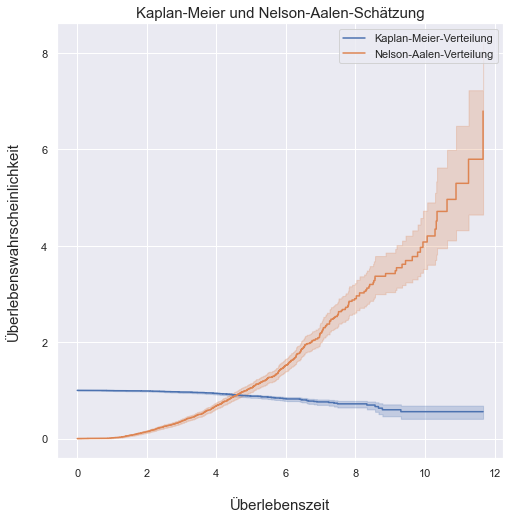

In [25]:
#Beide Verteilungen in eine Grafik
sns.set(rc={'figure.figsize':(8,8)})
plt.figure()
#durations = Lebensdauer; event_observed = Zensur
kmf.fit(durations =  df["Lebensdauer"], event_observed = df["Zensur"], label = 'Kaplan-Meier-Verteilung')
ax = kmf.plot()
naf = NelsonAalenFitter(nelson_aalen_smoothing=False)
naf.fit(df["Lebensdauer"], event_observed = df["Zensur_2"], label = 'Nelson-Aalen-Verteilung')
naf.cumulative_hazard_
ax = naf.plot(ax=ax)
#Überschrift
plt.title("Kaplan-Meier und Nelson-Aalen-Schätzung",fontsize=15)
#Benennung der y-Achse
plt.ylabel("Überlebenswahrscheinlichkeit",fontsize=15, labelpad=20)
#Benennung der x-Achse
plt.xlabel("Überlebenszeit",fontsize=15, labelpad=20)
#Legende plotten
plt.legend()
plt.show()

## Weibul-Verteilung
Gibt Aussagen über die Ausfallwahrscheinlichkeit zu bestimmten Laufzeiten.


wbf = WeibullFitter().fit(df["a"], df["b"], label='Weibull')


a = Daten["Zeit"]   Hierbei wird die Spalte mit den Zeiteinheiten angegeben (Tage, Wochen..).

b = Daten["Zensur"]    Hierbei wird die Spalte angegeben die angibt, ob das Ereignis eintritt oder nicht (0 & 
1).

- 1 = Fehler/Ausfall
- 0 = kein Fehler/ nicht zensiert


Bei der Lebensdauer darf der Wert 0 nicht vorkommen. Darum werden alle Lebensdauer-Werte mit 0,00001 addiert.

In [12]:
#Überprüfen, ob es einen Null-Wert gibt
a = 0 in df.Lebensdauer 
#Wenn diese Aussage wahr ist, dann wird ein kleiner Wert dazu addiert
if a == True:
    print('Der Wert Null kommt vor.\nUm die Weibull-Verteilung durchzuführen, wird zu den Werten der Lebensdauer 1E-15 hinzuaddiert.')
    df.Lebensdauer = df.Lebensdauer + 1e-15
#Wenn diese Aussage falsch ist, dann kommt eine Meldung
else:
    print('Der Wert Null kommt NICHT vor')
    

Der Wert Null kommt vor.
Um die Weibull-Verteilung durchzuführen, wird zu den Werten der Lebensdauer 1E-15 hinzuaddiert.


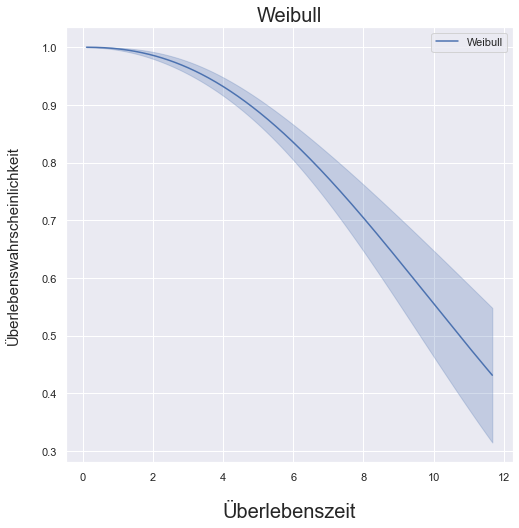

Für diese Weibullverteilung ergibt sich ein Lamda-Wert von 12.576 
Für diese Weibullverteilung ergibt sich ein Rho-Wert von  2.316


In [31]:
#Weibull-Verteilung
wbf = WeibullFitter().fit(df["Lebensdauer"], df["Zensur"], label='Weibull')
#Grafik plotten
sns.set(rc={'figure.figsize':(8,8)})
plt.figure()
wbf.plot_survival_function()
#Überschrift
plt.title("Weibull",fontsize=20)
#Benennung der y-Achse
plt.ylabel("Überlebenswahrscheinlichkeit",fontsize=15, labelpad=20)
#Benennung der x-Achse
plt.xlabel("Überlebenszeit",fontsize=20, labelpad=20)
plt.show()
#wbf.params_ Befehl, um die Parameter µ und sigma auszugeben
l=wbf.lambda_
r=wbf.rho_
print('Für diese Weibullverteilung ergibt sich ein Lamda-Wert von',"%.3f" %l,'\nFür diese Weibullverteilung ergibt sich ein Rho-Wert von ',"%.3f" %r)

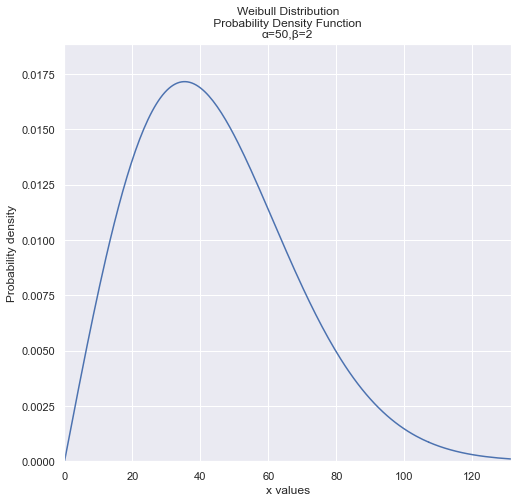

In [32]:
#%%#
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt
dist = Weibull_Distribution(alpha=50, beta=2)  # this created the distribution object
dist.PDF()  # this creates the plot of the PDF
plt.show()

RV : 
Random Variates : 
 [8.00000775e-01 1.07887997e+00 4.24486034e+03 8.00000000e-01
 5.06131701e+02 4.41157397e+00 8.06475937e-01 2.49781875e+02
 1.95825972e+03 2.94337820e+00]

Probability Distribution : 
 [0.00000000e+000 1.01939341e-099 1.15142533e-199 1.30055804e-299
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]
Distribution : 
 [0.         0.06122449 0.12244898 0.18367347 0.24489796 0.30612245
 0.36734694 0.42857143 0.48979592 0.55102041 0.6122449  0.67346939
 0.73469388 0.79591837 0.85714286 0.91836735 0.97959184 1.04081633
 1.10204082 1.16326531 1.2244898  1.28571429 1.34693878 1.40816327
 1.46938776 1.53061224 1.59183673 1.65306122 1.71428571 1.7755102
 1.83673469 1.89795918 1.95918367 2.02040816 2.08163265 2.14285714
 2.20408163 2.26530612 2.32653061 2.3877551  2.44897959 2.51020408
 2.57142857 2.63265306 2.69387755 2.75510204 2.81632653 2.87755102
 2.93877551 3.        ]


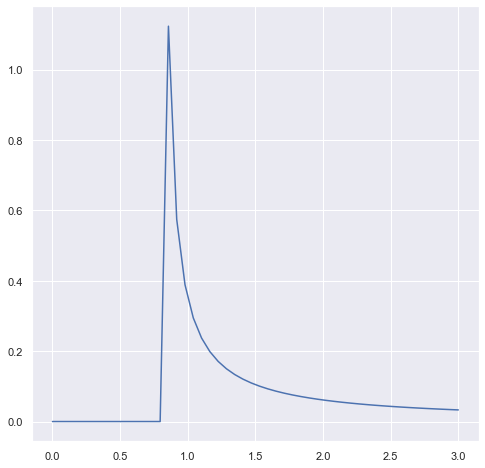

In [29]:
# importing library
  
from scipy.stats import weibull_min 
    
numargs = weibull_min .numargs 
a, b = 0.2, 0.8
rv = weibull_min (a, b) 
    
print ("RV : \n", rv) 
import numpy as np 
quantile = np.arange (0.01, 1, 0.1) 
  
# Random Variates 
R = weibull_min .rvs(a, b, size = 10) 
print ("Random Variates : \n", R) 
  
# PDF 
x = np.linspace(weibull_min.ppf(0.01, a, b),
                weibull_min.ppf(0.99, a, b), 10)
R = weibull_min.pdf(x, 1, 3)
print ("\nProbability Distribution : \n", R) 
distribution = np.linspace(0, np.minimum(rv.dist.b, 3)) 
print("Distribution : \n", distribution) 
     
plot = plt.plot(distribution, rv.pdf(distribution))

In [30]:
x = np.linspace(1,10,100)
plt.plot(x,scipy.stats.weibull_min(c=3).pdf(x))

NameError: name 'scipy' is not defined

Die zwei Parameter Lamda und Rho werden berechnet:

In [ ]:
#wbf.params_
l=wbf.lambda_ #Maßstab
r=wbf.rho_    #Form
print('Für diese Weibullverteilung ergibt sich ein Lamda-Wert von',"%.3f" %l,'\nFür diese Weibullverteilung ergibt sich ein Rho-Wert von ',"%.3f" %r)

## Lognorm


Zuerst müssen die maximal und minimal-Werte von der Variable Lebensdauer ermittelt werden.

In [15]:
#Minimalwert der Lebensdauer bestimmen
value_min = min(df.Lebensdauer)
#Maximalwert der Lebensdauer bestimmen
value_max = max(df.Lebensdauer)
print('Der Minimal-Wert der Lebensdauer beträgt', '%.0f'%value_min)
print('Der Minimal-Wert der Lebensdauer beträgt', '%.0f'%value_max)

Der Minimal-Wert der Lebensdauer beträgt 0
Der Minimal-Wert der Lebensdauer beträgt 12


Sigma entspricht: 0.55 
µ entspricht: 1.29


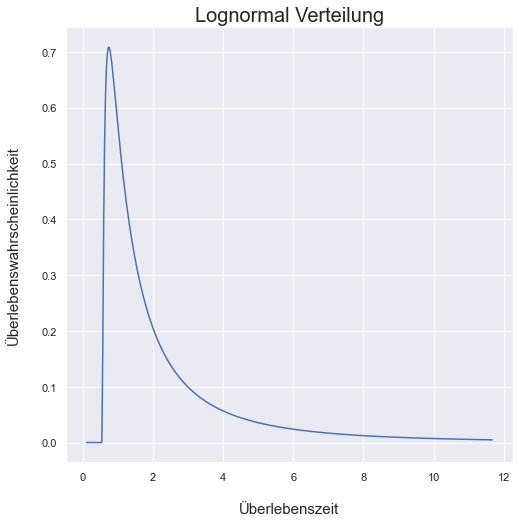

In [23]:
#µ und sigma schätzen
s, loc, scale = stats.lognorm.fit(df.Lebensdauer, floc=0) #x0 is rawdata x-axis
mu = np.log(scale)
sigma = s
print('Sigma entspricht:','%.2f'%s,'\nµ entspricht:','%.2f'%mu)
#n ist die hälfe aller Werte
n = df.shape[0]/2  
#n wird zu einem integer
n =int(n)
#n Zahlen zwischen dem maximal und minimal-Wert der Lebensdauer
z = np.linspace(value_min,value_max,n)
#Grafik plotten
sns.set(rc={'figure.figsize':(8,8)})
plt.figure()
a = stats.lognorm.pdf(z,mu,sigma)
#Überschrift
plt.title("Lognormal Verteilung",fontsize=20)
#Benennung der y-Achse
plt.ylabel("Überlebenswahrscheinlichkeit",fontsize=15, labelpad=20)
#Benennung der x-Achse
plt.xlabel("Überlebenszeit",fontsize=15, labelpad=20)
sns.lineplot(x=z, y=a)
plt.show()

In [ ]:
print('Für diese Lognormal-Verteilung ergibt sich ein Sigma-Wert von',"%.3f" %s,'\nFür diese Lognormal-Verteilung ergibt sich ein µ-Wert von ',"%.3f" %mu)

## Cox-Regression
Verfahren um die Auswirkung der Einflüsse auf die Zensur zu schätzen.

Um die Cox-Regression durchzuführen, müssen die beinflussenden Variablen eingegeben werden.
Geben Sie die Variablen ein die Sie überprüfen wollen:
Groß- und Kleinschreibung beachten

In [17]:
#Eine Tabelle wird mit den Variablen Lebensdauer und Zensur erstellt
Variablen=['Lebensdauer','Zensur']
Tabelle=df.loc[:,Variablen]
#Abfrage wie viele Variablen untersucht werden sollen
C_R = input('Wie viele Variableln wollen Sie testen? (Zahl eingeben)')
#Schleife die alle eingegebene Variablen in die Tabelle hinzufügt
for x in range(0, int(C_R)):
    a = input('Bitte geben Sie die Variable ein:  ')
    Tabelle.insert(x, a ,df[a],True)
    print('Sie haben folgende Variablen eingegeben:'+ a)
    if x == C_R:
       break 
#Anzeigen der neuen Tabelle
Tabelle.head()
#Erscheind bei dieser Ausgabe eine Fehlermeldung wurden die Variablen fehlerhaft eingegeben. 

Wie viele Variableln wollen Sie testen? (Zahl eingeben)2
Bitte geben Sie die Variable ein:  Modell
Sie haben folgende Variablen eingegeben:Modell
Bitte geben Sie die Variable ein:  Baujahr
Sie haben folgende Variablen eingegeben:Baujahr


,Modell,Baujahr,Lebensdauer,Ereignis
0,1,2019,3.063836,0
1,1,2020,1.574984,0
2,1,2021,3.995907,0
3,2,2019,2.936783,0
4,2,2020,7.229553,1


Nun wird mit der oder den ausgewählten Variablen die Cox-Regression durchgeführt.

In [1]:
#Eine Cox-Regression wird durchgeführt
cph = CoxPHFitter()
#Grafik plotten
plt.figure()
#durations = Lebensdauer; event_observed = Zensur
cph. fit(Tabelle, duration_col = 'Lebensdauer', event_col = 'Zensur')
#Tabelle mit den ausgewerteten Werten
cph.summary

NameError: name 'CoxPHFitter' is not defined

In [ ]:
print('Koeffizenten:')
print(cph.params_)



In [ ]:
cph.confidence_#intervals_


In [ ]:
cph.hazard_ratios_

In [ ]:
cph.standard_errors_


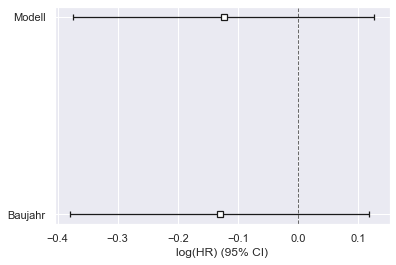

In [20]:
plt.figure()
sns.set(rc={'figure.figsize':(10,10)})

cph.plot()
plt.show()


